In [ ]:
!unzip yourfile.zip -d /content/unzipped_files

unzip:  cannot find or open yourfile.zip, yourfile.zip.zip or yourfile.zip.ZIP.


In [ ]:
!apt-get install unrar


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import zipfile


In [ ]:
zip_file_path = '/content/drive/MyDrive/Trash_classification/Trashv2iyolov8.zip'
extract_to_path = '/content/drive/MyDrive/Trash_classification/datav2'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Unzipping complete!")

NameError: name 'zipfile' is not defined

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
import ultralytics
import os
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [ ]:
# 1. Tải mô hình YOLOv8n (nhỏ)
model = YOLO('yolov8n.pt')

# 2. Định nghĩa các class trong dataset
# Ví dụ: ['Chai nhựa', 'Giấy', 'Kim loại']
classes = ['plastic', 'mask', 'glass_bottle', 'cardboard', 'metal', 'paper']

data_demo = '/content/drive/MyDrive/Trash_classification/datav2/data.yaml'

# 3. Huấn luyện mô hình với dataset custom
# Thay đổi 'path/to/your/dataset' bằng đường dẫn đến dataset của bạn
model.train(data= data_demo, epochs=100, imgsz=224, batch=16, name='trash_detector')

# 4. Lưu mô hình huấn luyện
model.save('trash_detector.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 51.9MB/s]


Ultralytics YOLOv8.2.74 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Trash_classification/datav2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=trash_detector, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False

100%|██████████| 755k/755k [00:00<00:00, 10.5MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/Trash_classification/datav2/train/labels.cache... 1629 images, 12 backgrounds, 0 corrupt: 100%|██████████| 1629/1629 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 312, len(boxes) = 2762. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Trash_classification/datav2/valid/labels.cache... 155 images, 0 backgrounds, 0 corrupt: 100%|██████████| 155/155 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 25, len(boxes) = 198. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/trash_detector/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/detect/trash_detector
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.221      3.069      1.384         75        224: 100%|██████████| 102/102 [04:18<00:00,  2.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:56<00:00, 11.38s/it]

                   all        155        198      0.298       0.45      0.371      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      1.241      2.074      1.425         46        224: 100%|██████████| 102/102 [03:04<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.70s/it]

                   all        155        198      0.234      0.451      0.224      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G      1.219      1.815      1.405         38        224: 100%|██████████| 102/102 [02:59<00:00,  1.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.67s/it]

                   all        155        198      0.361      0.583      0.393      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      1.198      1.755      1.385         34        224: 100%|██████████| 102/102 [03:04<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:09<00:00,  1.80s/it]

                   all        155        198      0.365      0.603       0.49      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G      1.163      1.628      1.354         38        224: 100%|██████████| 102/102 [03:00<00:00,  1.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.68s/it]

                   all        155        198      0.341      0.614      0.486      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G       1.11      1.585      1.321         59        224:  29%|██▉       | 30/102 [01:01<02:27,  2.05s/it]


KeyboardInterrupt: 


0: 224x224 1 cardboard, 53.4ms
Speed: 5.7ms preprocess, 53.4ms inference, 3.5ms postprocess per image at shape (1, 3, 224, 224)


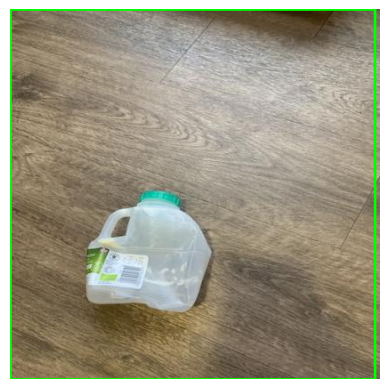

In [ ]:

# 1. Tải mô hình đã huấn luyện
model = YOLO('/content/runs/detect/trash_detector/weights/last.pt')  # Đường dẫn đến mô hình đã huấn luyện của bạn

# 2. Định nghĩa hàm nhận diện đối tượng từ ảnh
def detect_objects(image_path, model):
    # Đọc ảnh
    img = cv2.imread(image_path)

    # Chạy mô hình để nhận diện đối tượng
    results = model(img)

    # Vẽ bounding box và nhãn lên ảnh
    for result in results:
        boxes = result.boxes.xyxy.numpy()  # Bounding box
        labels = result.boxes.cls.numpy()  # Class labels
        scores = result.boxes.conf.numpy() # Confidence scores

        for box, label, score in zip(boxes, labels, scores):
            x1, y1, x2, y2 = box
            class_name = model.names[int(label)]
            color = (0, 255, 0)  # Màu xanh lá cho bounding box

            # Vẽ bounding box
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)

            # Vẽ nhãn
            cv2.putText(img, f'{class_name} {score:.2f}', (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    # Hiển thị ảnh
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# 3. Chạy hàm với ảnh đầu vào
image_path = '/content/drive/MyDrive/Trash_classification/HDPEM133_jpg.rf.68f667d94e85a30ff89252f5239a7bec.jpg'  # Thay bằng đường dẫn đến file ảnh của bạn
detect_objects(image_path, model)
